In [ ]:
!pip install --upgrade transformers datasets evaluate huggingface_hub torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.46.2
    Uninstalling transformers-4.46.2:
      Successfully uninstalled transformers-4.46.2
ERROR: pip's depen

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
test=pd.read_csv('/content/emotion-labels-test.csv')
train=pd.read_csv('/content/emotion-labels-train.csv')
val=pd.read_csv('/content/emotion-labels-val.csv')

In [ ]:
train.shape, val.shape, test.shape

((3613, 2), (347, 2), (3142, 2))

In [ ]:
# Combine without shuffling
df = pd.concat([train, val, test], axis=0).reset_index(drop=True)

# Display the first few rows
df.head()

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy


In [ ]:
df

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy
...,...,...
7097,Why does Candice constantly pout #GBBO 💄😒,sadness
7098,"@redBus_in #unhappy with #redbus CC, when I ta...",sadness
7099,"@AceOperative789 no pull him afew weeks ago, s...",sadness
7100,I'm buying art supplies and I'm debating how s...,sadness


In [ ]:
df.shape

(7102, 2)

In [ ]:
"""df['text_len'] = df.text.apply(len)
df.head()"""

"df['text_len'] = df.text.apply(len)\ndf.head()"

In [ ]:
labels_dict = {}

for idx, label in enumerate(df.label.unique()):
    labels_dict[label] = idx

labels_dict

df.label = df.label.apply(lambda x: labels_dict[x])


In [ ]:
labels_dict

{'joy': 0, 'fear': 1, 'anger': 2, 'sadness': 3}

In [ ]:
feeling_type_counts = df['label'].value_counts()

In [ ]:
feeling_type_counts

,count
label,
1,2252
2,1701
0,1616
3,1533


In [ ]:
fear_feeling = df[df['label']== 1]
joy_feeling = df[df['label']== 0]
anger_feeling = df[df['label']== 2]
sadness_feeling = df[df['label']== 3]

In [ ]:
joy_feeling = joy_feeling.sample(sadness_feeling.shape[0])
fear_feeling = fear_feeling.sample(sadness_feeling.shape[0])
anger_feeling = anger_feeling.sample(sadness_feeling.shape[0])

In [ ]:
joy_feeling.shape, anger_feeling.shape,fear_feeling.shape,sadness_feeling.shape

((1533, 2), (1533, 2), (1533, 2), (1533, 2))

In [ ]:
dataset= pd.concat([joy_feeling, anger_feeling,fear_feeling,sadness_feeling], ignore_index = True)
dataset

,text,label
0,I'm the reason I smile everyday 💯,0
1,Please stop your merriment. It is very annoying,0
2,@GOT7Official @jrjyp happy birthday jin young!...,0
3,"If you want others to be #happy, practice #com...",0
4,Thank you disney themed episode for letting me...,0
...,...,...
6127,Why does Candice constantly pout #GBBO 💄😒,3
6128,"@redBus_in #unhappy with #redbus CC, when I ta...",3
6129,"@AceOperative789 no pull him afew weeks ago, s...",3
6130,I'm buying art supplies and I'm debating how s...,3


In [ ]:
dataset.label.value_counts()

,count
label,
0,1533
2,1533
1,1533
3,1533


In [ ]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("bhadresh-savani/albert-base-v2-emotion")
model = AutoModelForSequenceClassification.from_pretrained("bhadresh-savani/albert-base-v2-emotion")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/428 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/245 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [ ]:
from transformers import AutoTokenizer
from datasets import Dataset

# Assuming 'dataset' is a pandas DataFrame
# Convert the pandas DataFrame to a Hugging Face Dataset
dataset_hf = Dataset.from_pandas(dataset)

def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = dataset_hf.map(tokenize_function, batched=True)

Map:   0%|          | 0/6132 [00:00<?, ? examples/s]

In [ ]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = tokenized_datasets.train_test_split(test_size=0.2, seed=0).values()
test_dataset, eval_dataset = test_dataset.train_test_split(test_size=0.5, seed=0).values()

In [ ]:
from huggingface_hub import login
login()

In [ ]:
from transformers import Trainer, TrainingArguments

# ตั้งค่าการฝึก
training_args = TrainingArguments(
    output_dir="./results",
    run_name="my_run_name",  # Change this to a specific name for your run
)

# Trainer สำหรับฝึกโมเดล
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,  # ชุดข้อมูลฝึก
    eval_dataset=eval_dataset  # ชุดข้อมูลประเมิน
)

#trainer.train()

In [ ]:
train_dataset

Dataset({
    features: ['text', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 4905
})

In [ ]:
model.push_to_hub("chayamond/albert-base-emotion_predict")

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "bhadresh-savani/albert-base-v2-emotion"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained("chayamond/albert-base-emotion_predict")

config.json:   0%|          | 0.00/1.16k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

In [ ]:
#Create DataLoader
test_dataloader = DataLoader(test_dataset, batch_size=256)

model.eval()

# เก็บค่าผลลัพธ์ที่คาดการณ์ได้ และค่าจริง (labels)
all_predictions = []
all_labels = []

# ปิด gradient (เพื่อให้ทำงานเร็วขึ้น)
with torch.no_grad():
    for batch in test_dataloader:
        inputs = tokenizer(batch['text'], return_tensors='pt', padding=True, truncation=True)
        labels = batch['label']

        # นำข้อมูลเข้าโมเดลและได้ logits
        outputs = model(**inputs)
        logits = outputs.logits

        # แปลง logits เป็นค่าความน่าจะเป็น
        probabilities = F.softmax(logits, dim=-1)

        # หาคลาสที่โมเดลทำนาย (ค่า 0 หรือ 1)
        predictions = torch.argmax(probabilities, dim=-1)

        # เก็บค่าผลลัพธ์
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels)

In [ ]:
label_mapping = { 0 : 'joy', 1 : 'fear', 2 : 'anger', 3 : 'sadness'}
# Convert predictions to strings before mapping
all_predictions = [label_mapping[pred] for pred in all_predictions]
all_labels = [label_mapping[label.item()] for label in all_labels]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(all_predictions, all_labels))

              precision    recall  f1-score   support

       anger       0.80      0.92      0.86       148
        fear       0.85      0.69      0.76       178
         joy       0.87      0.94      0.90       134
     sadness       0.80      0.80      0.80       153

    accuracy                           0.83       613
   macro avg       0.83      0.84      0.83       613
weighted avg       0.83      0.83      0.83       613



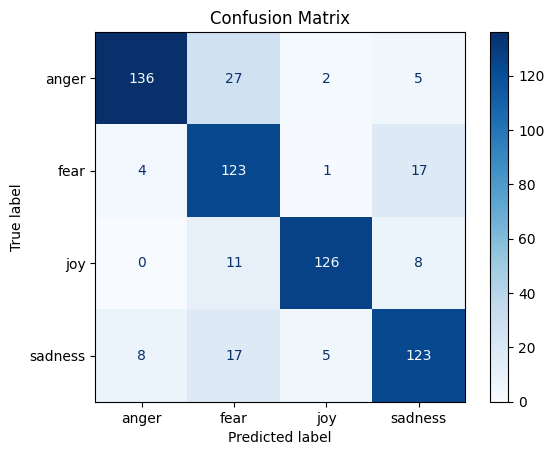

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ข้อมูลจำลอง: y_true ค่าจริง, y_pred ค่าทำนาย
y_true = all_labels  # ค่าจริง (1 = Positive, 0 = Negative)
y_pred = all_predictions  # ค่าทำนาย (1 = Positive, 0 = Negative)

# สร้าง confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=np.unique(all_labels + all_predictions)) # Ensures all labels are present in cm

# Get unique labels from your data, accounting for both true and predicted values
labels = np.unique(all_labels + all_predictions) # Get labels from both y_true and y_pred

# พล็อต confusion matrix using the extracted labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels) # Updated line
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()